In [75]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [86]:
#importing dataset
df = pd.read_csv("D:/PARTH SHAH/R/ALY 6020/Module 2 Midweek Project/CarPrice_Assignment.csv")

In [87]:
df.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [89]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [90]:
df.drop_duplicates()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [91]:
df.drop(columns=['CarName','car_ID','enginetype','fuelsystem','enginelocation','aspiration','fueltype', 'stroke','compressionratio','peakrpm'],axis=1,inplace=True)
df.head(5)

,symboling,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,horsepower,citympg,highwaympg,price
0,3,two,convertible,rwd,88.6,168.8,64.1,48.8,2548,four,130,3.47,111,21,27,13495.0
1,3,two,convertible,rwd,88.6,168.8,64.1,48.8,2548,four,130,3.47,111,21,27,16500.0
2,1,two,hatchback,rwd,94.5,171.2,65.5,52.4,2823,six,152,2.68,154,19,26,16500.0
3,2,four,sedan,fwd,99.8,176.6,66.2,54.3,2337,four,109,3.19,102,24,30,13950.0
4,2,four,sedan,4wd,99.4,176.6,66.4,54.3,2824,five,136,3.19,115,18,22,17450.0


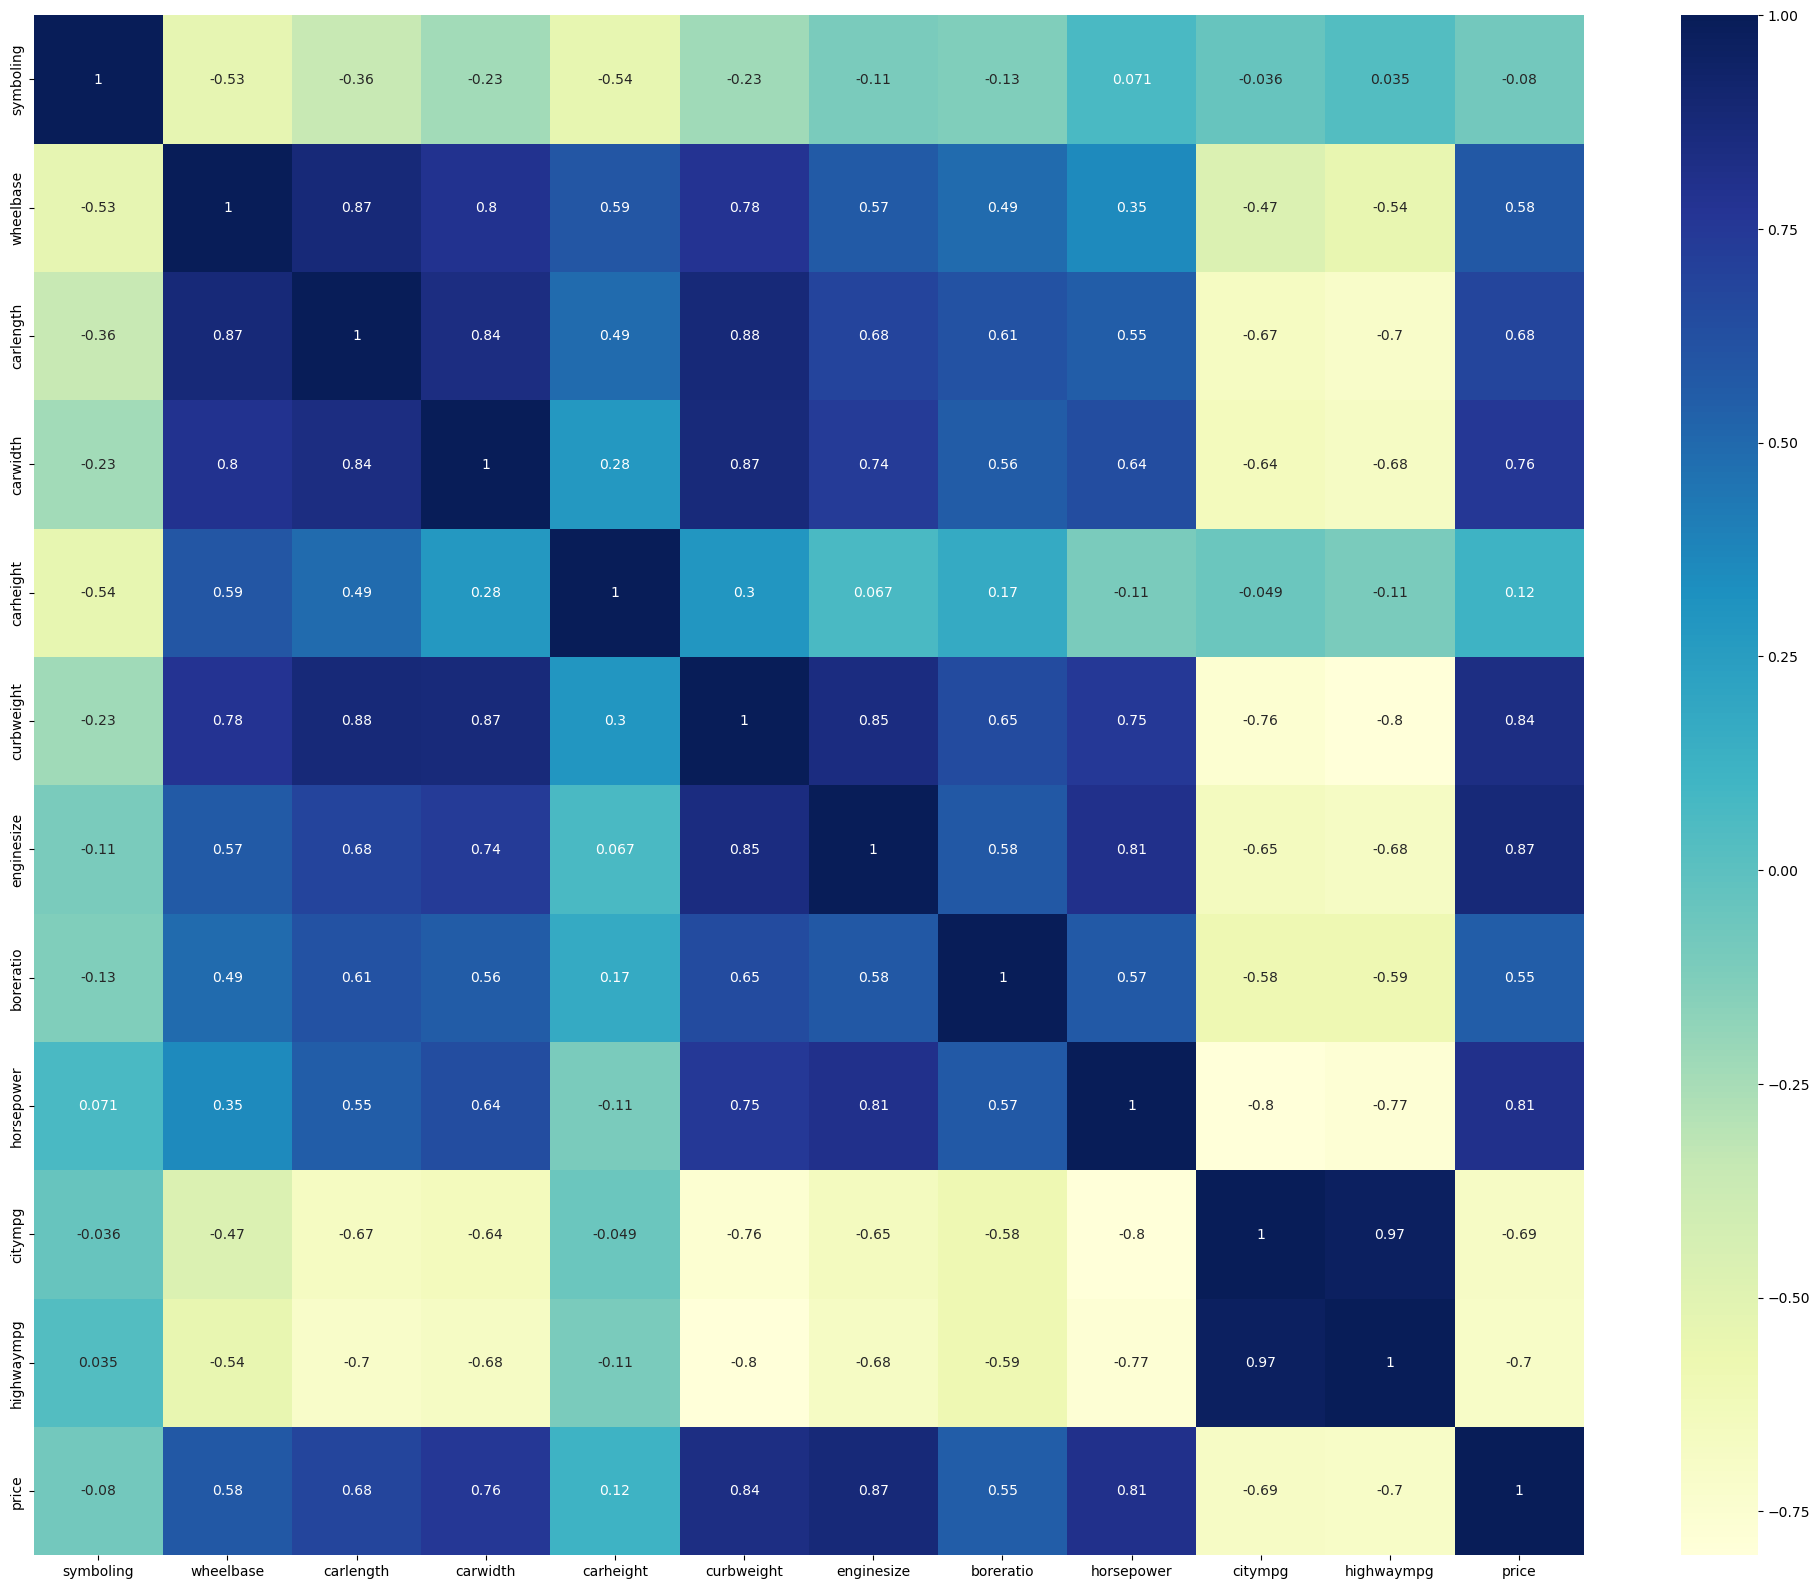

In [93]:
#Correlation Matrix
plt.figure(figsize=(25,20))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.show()

In [95]:
# Create a correlation matrix
corr_matrix = df.corr()
top_corr_vars = corr_matrix['price'].sort_values(ascending=False).head(4)
print(top_corr_vars)

price         1.000000
enginesize    0.874145
curbweight    0.835305
horsepower    0.808139
Name: price, dtype: float64


In [96]:
#Determining categorical variables
categorical_variables = df.select_dtypes(include=['object'])
categorical_variables.head()

,doornumber,carbody,drivewheel,cylindernumber
0,two,convertible,rwd,four
1,two,convertible,rwd,four
2,two,hatchback,rwd,six
3,four,sedan,fwd,four
4,four,sedan,4wd,five


In [97]:
# converting to dummy variables
dummies = pd.get_dummies(categorical_variables,drop_first=True)
dummies.head()

,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,1,0,0,0,0,0,1,0,1,0,0,0,0
1,1,0,0,0,0,0,1,0,1,0,0,0,0
2,1,0,1,0,0,0,1,0,0,1,0,0,0
3,0,0,0,1,0,1,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,1,0,0,0,0,0


In [98]:
# concat the dummies dataframe to the main dataframe
df = pd.concat([df,dummies],axis=1)
df.drop(columns=categorical_variables.columns,axis=1,inplace=True)
df.head(5)

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,horsepower,citympg,...,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,111,21,...,0,0,0,1,0,1,0,0,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,111,21,...,0,0,0,1,0,1,0,0,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,154,19,...,0,0,0,1,0,0,1,0,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,102,24,...,1,0,1,0,0,1,0,0,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,115,18,...,1,0,0,0,1,0,0,0,0,0


In [99]:
#Defining x and y
x = df_train.drop('price',1)
y = df_train['price']

In [71]:
#splitting dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [72]:
#Scaling
scaler = StandardScaler()
x_train[x_train.columns] = scaler.fit_transform(x_train)

In [100]:
# create linear regression model
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
y_pred = lin_reg.predict(x_test)
X = sm.add_constant(x)
lm_8 = sm.OLS(y,X).fit()
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     39.12
Date:                Sun, 22 Jan 2023   Prob (F-statistic):           1.43e-47
Time:                        14:48:31   Log-Likelihood:                -1426.7
No. Observations:                 153   AIC:                             2903.
Df Residuals:                     128   BIC:                             2979.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -5.162e+

In [101]:
#Accuracy of model
lin_reg.score(x_train,y_train)

0.9017006809275326

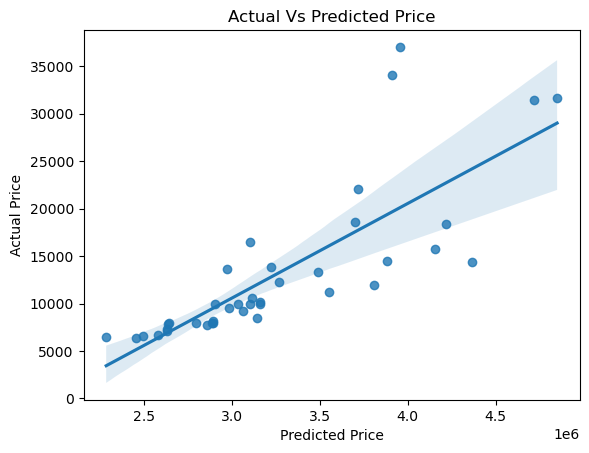

In [102]:
#Actual Vs Predicted Price
pred = lin_reg.predict(x_test)
sns.regplot(x=pred, y=y_test)
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.title("Actual Vs Predicted Price")
plt.show()